<a href="https://colab.research.google.com/github/vijay9119y/Internsavy_Projects/blob/main/ClusteringOnCustomerDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing required libraries**


In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as pt

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

import warnings
warnings.simplefilter("ignore")

In [2]:
# Loading dataset or dataframe
mall=pd.read_csv("Mall_Customers.csv")

In [3]:
# Looking for shape of dataframe
mall.shape

(200, 5)

In [4]:
# Head of the dataframe
mall.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
# Tail of the dataframe
mall.tail()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [6]:
# Datatypes involved..
mall.dtypes.value_counts()

int64     4
object    1
dtype: int64

In [7]:
# Information about Dataframe
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
# Removing white spaces and remaining columns
mall.columns=mall.columns.str.replace(" ","")
mall.columns

Index(['CustomerID', 'Genre', 'Age', 'AnnualIncome(k$)',
       'SpendingScore(1-100)'],
      dtype='object')

In [9]:
# renaming columns
mall.columns=mall.rename(columns={'AnnualIncome(k$)':'AnnualIncome',
                                  'SpendingScore(1-100)':'SpendingScore',"Genre":"Gender"}).columns
mall.columns

Index(['CustomerID', 'Gender', 'Age', 'AnnualIncome', 'SpendingScore'], dtype='object')

In [10]:
# Viewing int columns
int_col=mall.select_dtypes(include="int64").columns.tolist()
int_col

['CustomerID', 'Age', 'AnnualIncome', 'SpendingScore']

In [11]:
# Viewing categorical columns
cat_col=mall.select_dtypes(include="O").columns.tolist()
cat_col

['Gender']

In [12]:
# Drop the id column
copy_mall=mall.copy()
mall.drop("CustomerID",axis=1,inplace=True)
# Summary statistics
mall.describe()

,Age,AnnualIncome,SpendingScore
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


Text(0, 0.5, 'Count')

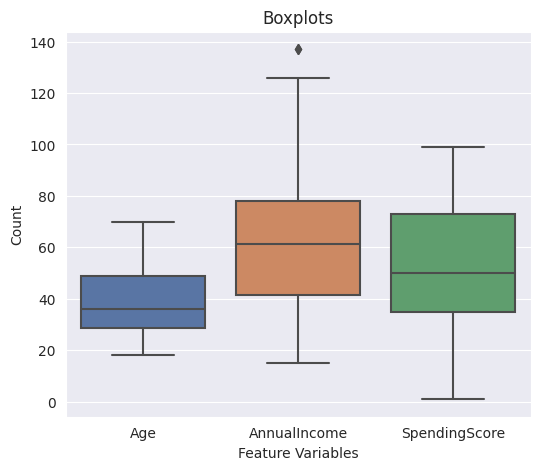

In [13]:
# looking for outliers through boxplot
sb.set({"figure.figsize":(6,5)})
sb.boxplot(mall)
pt.title("Boxplots")
pt.xlabel("Feature Variables")
pt.ylabel("Count")

Text(0, 0.5, 'Count')

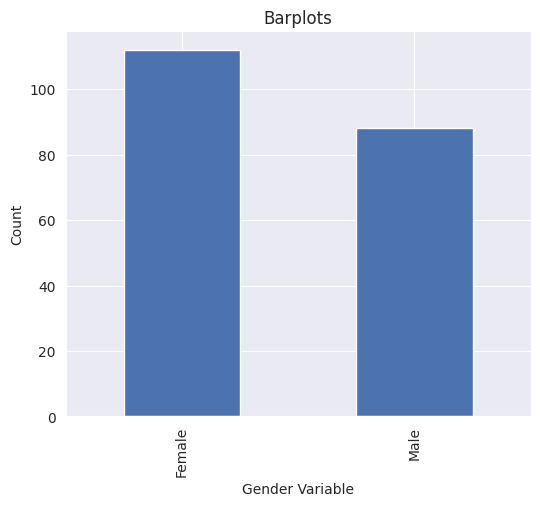

In [14]:
# Plotting gender for count
mall.Gender.value_counts().plot(kind="bar")
pt.title("Barplots")
pt.xlabel("Gender Variable")
pt.ylabel("Count")

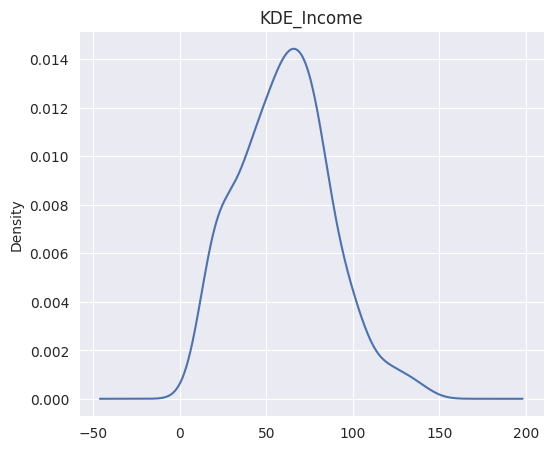

In [15]:
# KDE plot for Annual income
mall.AnnualIncome.plot(kind="kde")
pt.title('KDE_Income')
pt.show()

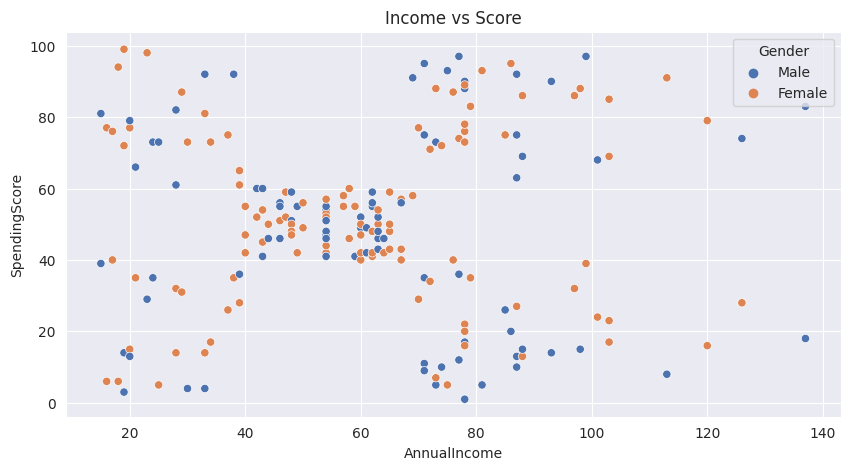

In [16]:
# Scatter plot for the AnnualIncome & SpendingScore
sb.set({"figure.figsize":(10,5)})
sb.scatterplot(data=mall,x='AnnualIncome',y='SpendingScore',hue="Gender")
pt.title('Income vs Score')
pt.show()

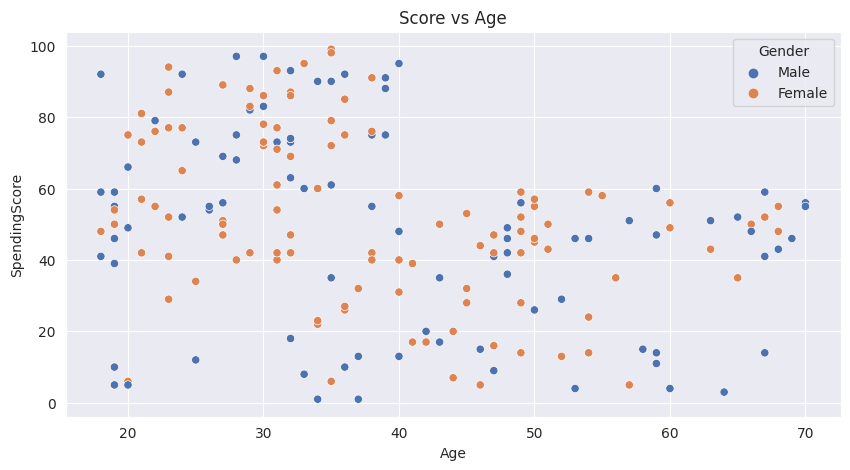

In [17]:
# Scatter plot for the Age & SpendingScore
sb.scatterplot(data=mall,x='Age',y='SpendingScore',hue="Gender")
pt.title('Score vs Age')
pt.show()

In [18]:
#converting gender to binary
mall.Gender=np.where(mall["Gender"]=="Male",1,0)
mall.Gender

0      1
1      1
2      0
3      0
4      0
      ..
195    0
196    0
197    1
198    1
199    1
Name: Gender, Length: 200, dtype: int64

In [19]:
mall.head()

,Gender,Age,AnnualIncome,SpendingScore
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


In [20]:
# Scaling desired columns for modelling
scaler=StandardScaler()
scaled_val=scaler.fit_transform(mall[["AnnualIncome","SpendingScore"]])
scaled_val[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

In [21]:
# Creating a new dataframe with out Gender variable
features=pd.DataFrame(scaled_val,columns=mall.columns[2:4].tolist())
features

,AnnualIncome,SpendingScore
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980
...,...,...
195,2.268791,1.118061
196,2.497807,-0.861839
197,2.497807,0.923953
198,2.917671,-1.250054


In [22]:
# To get optimal number of clusters (K) for KMeans cluster algo..
wcss=[]
for k in range(1,20):
    kmeans=KMeans(n_clusters=k,random_state=69)     # init function set to default of "k-means++"
    kmeans.fit(features)              # selecting Annual income,Spend score
    wcss.append(kmeans.inertia_)

wcss[:6]  #choosing upto 6 values

[400.00000000000006,
 269.01679374906655,
 157.7040081503594,
 108.92131661364358,
 65.56840815571681,
 55.057348270386015]

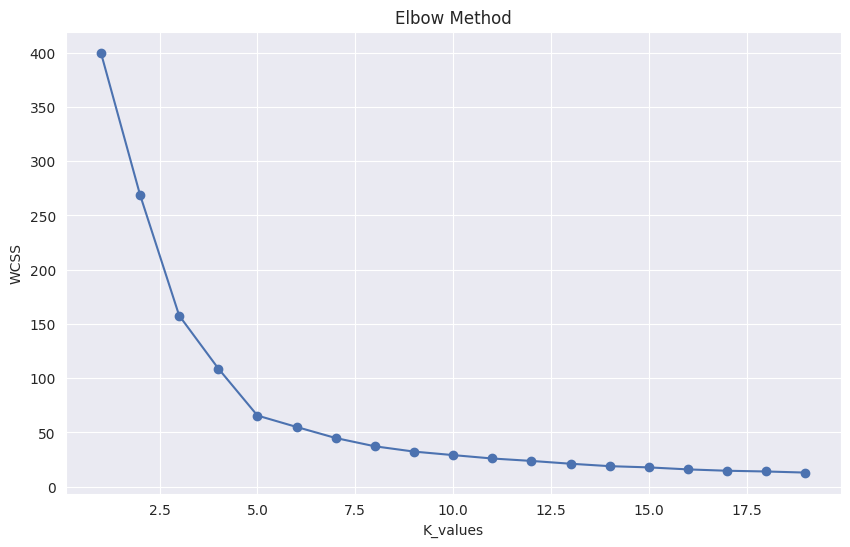

In [23]:
# Plotting of WCSS values using Elbow plot
pt.figure(figsize=(10,6))
pt.plot(range(1,20),wcss,marker="o")

pt.xlabel('K_values')
pt.ylabel('WCSS')
pt.title('Elbow Method')
pt.show()

In [24]:
# Modelling Kmeans clustring for k=5
kval=5

kmeans=KMeans(n_clusters=kval,max_iter=10,random_state=69)
kmeans.fit(features)

KMeans(max_iter=10, n_clusters=5, random_state=69)

In [25]:
#cluster lables for each datapoint
labels=kmeans.labels_
labels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 0,
       4, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [26]:
#centroids
centroids=kmeans.cluster_centers_
centroids

array([[-0.20091257, -0.02645617],
       [ 0.99158305,  1.23950275],
       [ 1.05500302, -1.28443907],
       [-1.32954532,  1.13217788],
       [-1.30751869, -1.13696536]])

In [27]:
# WCSS
e=kmeans.inertia_
e

65.56840815571681

In [28]:
#final required iterations
itr=kmeans.n_iter_
itr

5

In [29]:
# Adding predicted labels to features
new_features=features.assign(clusters=pd.DataFrame(labels))
new_features

,AnnualIncome,SpendingScore,clusters
0,-1.738999,-0.434801,4
1,-1.738999,1.195704,3
2,-1.700830,-1.715913,4
3,-1.700830,1.040418,3
4,-1.662660,-0.395980,4
...,...,...,...
195,2.268791,1.118061,1
196,2.497807,-0.861839,2
197,2.497807,0.923953,1
198,2.917671,-1.250054,2


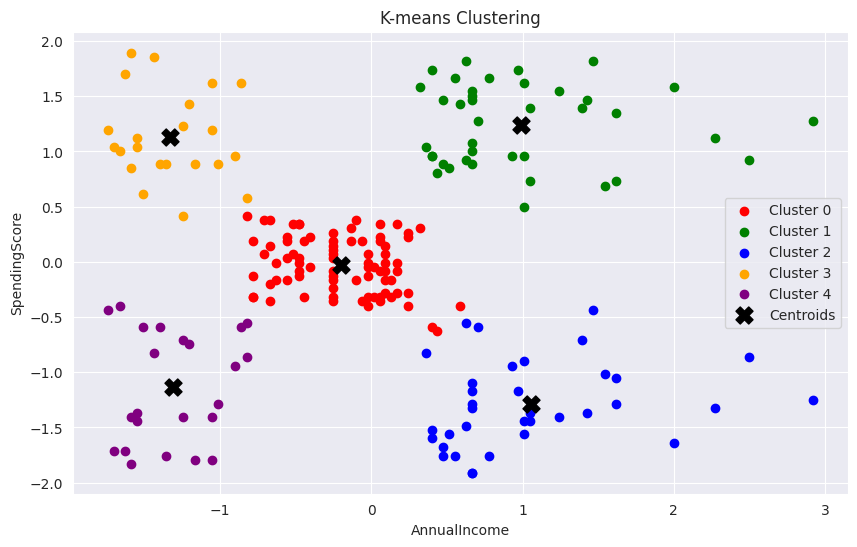

In [30]:
# Plot the clusters based on the labels assigned by K-means
pt.figure(figsize=(10, 6))

# Plot each cluster's data points with different colors
clr=["red","green","blue","orange","purple"]
for cluster_num in range(kval):
    pt.scatter(x=new_features[new_features.clusters == cluster_num]['AnnualIncome'],
               y= new_features[new_features.clusters == cluster_num]['SpendingScore'],marker='o',c=clr[cluster_num]
               ,label=f'Cluster {cluster_num}')

# Plot the cluster centers
pt.scatter(x=centroids[:, 0], y=centroids[:, 1],
            c='black', marker='X', s=150, label='Centroids')

pt.xlabel('AnnualIncome')
pt.ylabel('SpendingScore')
pt.title('K-means Clustering')
pt.legend()
pt.show()

In [31]:
#Evaluation Metric
score=metrics.silhouette_score(features,kmeans.labels_)
print("Silhouette_Score Coefficient : {:.2f}".format(score))

Silhouette_Score Coefficient : 0.55
